<a href="https://colab.research.google.com/github/Chzam/Computer-Vision/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zamer CHAUDHARY

# Exercise 2

 Task 1: Load an image and apply a thresholding method. Analyze and discuss the segmentation results.

Here N = 116352 and d = 1
The shape of the array should be 116352 x 1


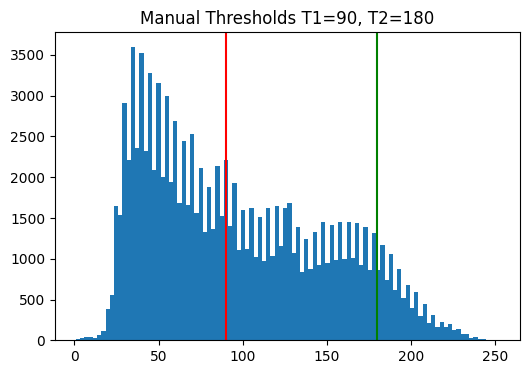

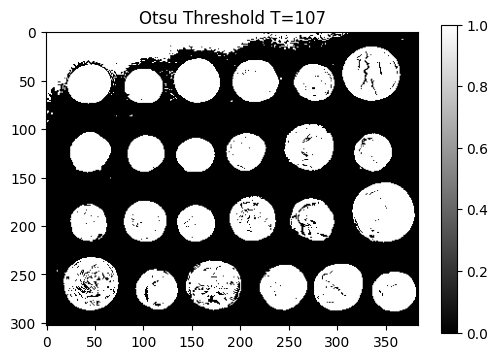

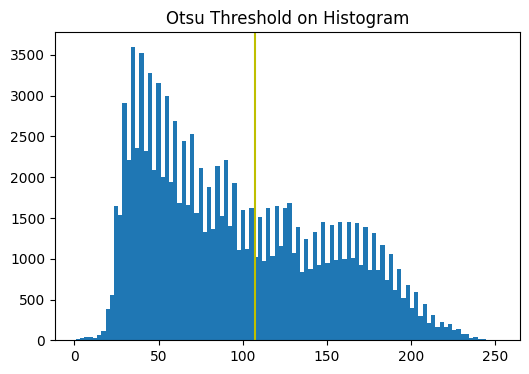

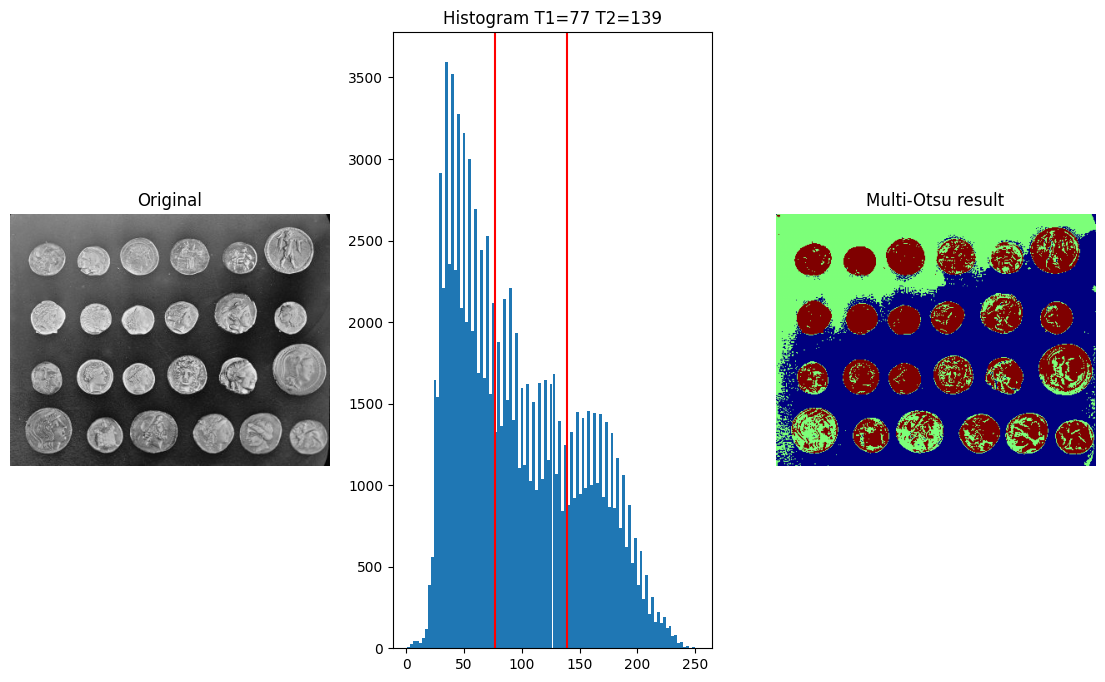

In [ ]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_multiotsu

# Load grayscale image
I = sk.data.coins()

# Reshape the image into N × d format
v_I = np.reshape(I, (I.shape[0] * I.shape[1], 1))
print('Here N = {} and d = {}'.format(I.shape[0] * I.shape[1], 1))
print('The shape of the array should be {} x {}'.format(I.shape[0] * I.shape[1], 1))
v_I.shape

# Flatten the image data
flat_data = I.flatten()

# ------------------------
# Manual threshold example
# ------------------------
T1 = 90
T2 = 180

fig = plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data, bins=100, range=[1, flat_data.max()])
plt.axvline(T1, color='r')
plt.axvline(T2, color='g')
plt.title('Manual Thresholds T1={}, T2={}'.format(T1, T2))
plt.show()

# ------------------------
# Otsu single thresholding
# ------------------------
thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary, cmap='gray')
plt.title('Otsu Threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(6,4), dpi=100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data, bins=100, range=[1, flat_data.max()])
plt.axvline(thresh, color='y')
plt.title('Otsu Threshold on Histogram')
plt.show()

# -----------------------------
# Otsu multi-thresholding
# -----------------------------
thresholds = threshold_multiotsu(I)
regions = np.digitize(I, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Original image
ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Histogram with thresholds
ax[1].hist(flat_data, bins=100, range=[1, flat_data.max()])
for t in thresholds:
    ax[1].axvline(t, color='r')
ax[1].set_title('Histogram T1={} T2={}'.format(thresholds[0], thresholds[1]))

# Multi-Otsu segmented image
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()


For Task 1, I explored three different segmentation methods on the coins image: manual thresholding, Otsu's method, and multi-Otsu thresholding. In the manual approach, I selected two thresholds (T1 = 90 and T2 = 180) based on the histogram. This roughly separated the image into background, mid-tones, and brighter areas. While it worked decently, I realized that manual thresholding is quite subjective and would probably fail if applied to other images with different lighting or contrast.

Next, I tried Otsu’s method, which automatically picked a threshold by maximizing the variance between background and foreground. The result was much cleaner and clearly separated the coins from the background. I could see this in the binary image, and the threshold it chose also matched well with the histogram. This method felt more reliable because it didn’t require any manual tuning.

Finally, I applied multi-Otsu thresholding. This method gave two thresholds instead of one, which allowed the image to be divided into three distinct regions. Visually, the segmented image was more detailed and captured the varying intensities better than the other two methods. It even handled the mid-intensity areas that single-threshold Otsu missed. Overall, I found multi-Otsu to be the most effective for this specific image because of its ability to separate different object intensities in a more refined way.



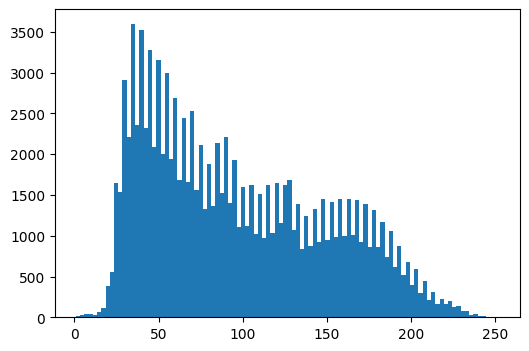

In [ ]:
import matplotlib.pyplot as plt


flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.show()


Here N = 116352 and d = 1
The shape of the array should be 116352 x 1
v_I.shape = (116352, 1)


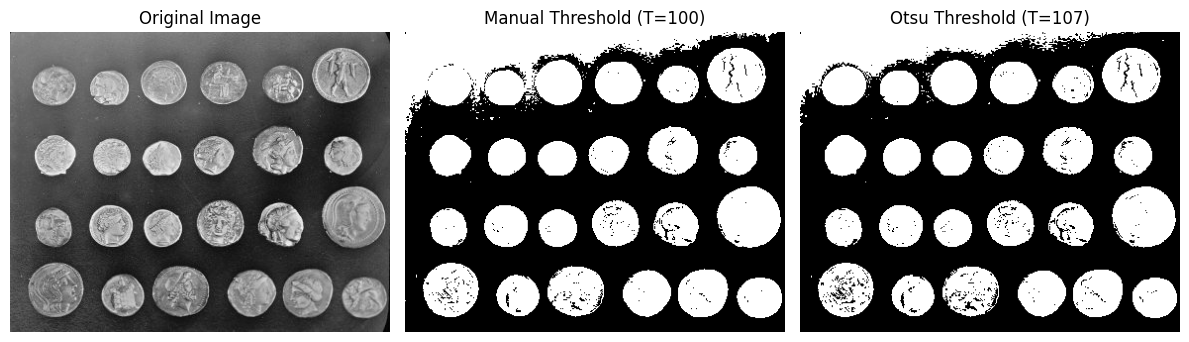

In [ ]:
import skimage as sk
from skimage import data
from skimage.filters import threshold_otsu
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load grayscale image
I = sk.data.coins()

# Step 2: Reshape image to N × d format (N pixels, d = 1 for grayscale)
v_I = np.reshape(I, (I.shape[0] * I.shape[1], 1))

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1], 1))
print('The shape of the array should be {} x {}'.format(I.shape[0]*I.shape[1], 1))
print('v_I.shape =', v_I.shape)

# Step 3: Apply manual threshold
T_manual = 100
BW_manual = I > T_manual

# Step 4: Apply Otsu threshold
T_otsu = threshold_otsu(I)
BW_otsu = I > T_otsu

# Step 5: Show original and segmented images
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(BW_manual, cmap='gray')
plt.title('Manual Threshold (T=100)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(BW_otsu, cmap='gray')
plt.title('Otsu Threshold (T={})'.format(int(T_otsu)))
plt.axis('off')

plt.tight_layout()
plt.show()


# Task 2: Load an image and apply an unsupervised segmentation method (e.g., K-Means). Evaluate and comment on the outcome.




In [ ]:
import skimage as sk
import numpy as np


I = sk.data.coffee() # load RGM image
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],I.shape[2]))
print('The sape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],I.shape[2]))

v_I.shape

Here N = 240000 and d = 3
The sape of the array should be 240000 x 3


(240000, 3)

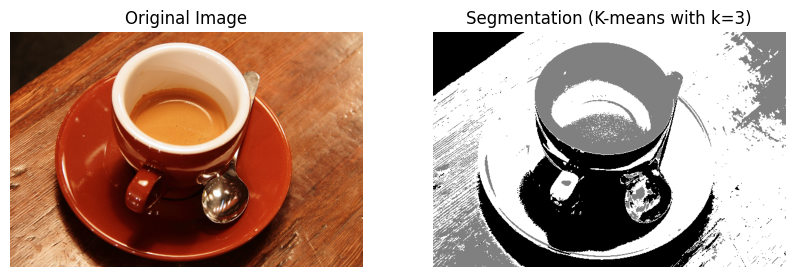

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

# Fit a Kmeans clustering model with two clusters using training image:
n_clus = 3
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1])) # reshape back to original image size
 # Shape back result as image

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

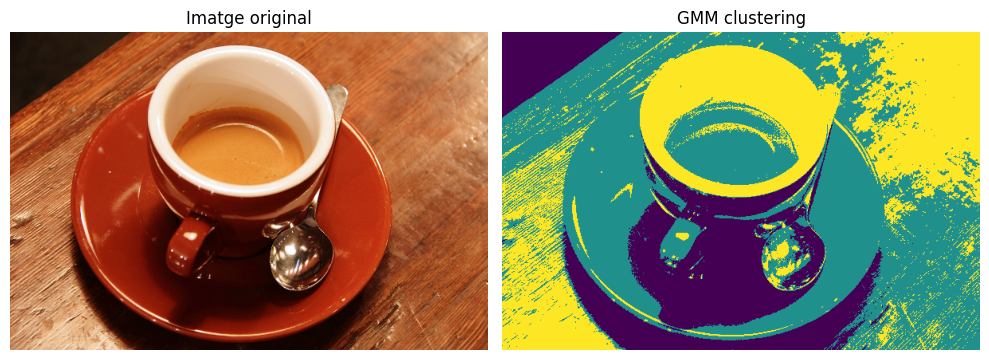

In [ ]:
import skimage as sk # load skimage libraries
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=3).fit(v_I) # Fit a GMM model
v_gmm = gmm.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(I)
ax0.set_title('Imatge original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(I_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(v_I)
    bic.append(gmm.bic(v_I))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm_win = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(v_I)

[np.float64(6963906.153347574)]
[np.float64(6963906.153347574), np.float64(6247910.767161153)]
[np.float64(6963906.153347574), np.float64(6247910.767161153), np.float64(6141312.424537782)]
[np.float64(6963906.153347574), np.float64(6247910.767161153), np.float64(6141312.424537782), np.float64(5980347.24480045)]
[np.float64(6963906.153347574), np.float64(6247910.767161153), np.float64(6141312.424537782), np.float64(5980347.24480045), np.float64(5911602.129543984)]
[np.float64(6963906.153347574), np.float64(6247910.767161153), np.float64(6141312.424537782), np.float64(5980347.24480045), np.float64(5911602.129543984), np.float64(5859681.00634012)]
[np.float64(6963906.153347574), np.float64(6247910.767161153), np.float64(6141312.424537782), np.float64(5980347.24480045), np.float64(5911602.129543984), np.float64(5859681.00634012), np.float64(5833816.2145362655)]
[np.float64(6963906.153347574), np.float64(6247910.767161153), np.float64(6141312.424537782), np.float64(5980347.24480045), np.flo

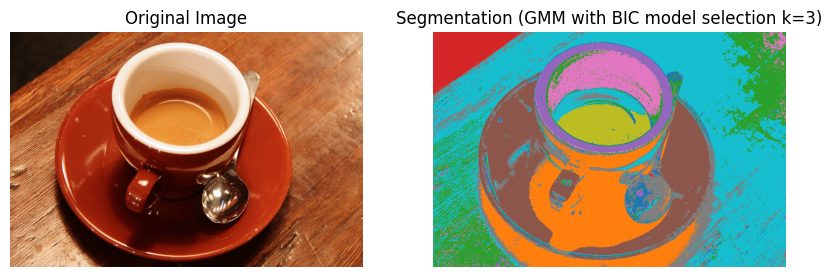

In [ ]:
v_gmm = gmm_win.fit_predict(v_I) # Predict GMM cluster labels for each pixel
I_gmm_bic = np.reshape(v_gmm,(I.shape[0],I.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_gmm_bic, cmap=plt.cm.tab10)
ax2.set_title('Segmentation (GMM with BIC model selection k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

I applied K-Means and GMM to segment the coffee image into three regions. Both methods were unsupervised and used pixel color values (RGB) for clustering. The K-Means result showed distinct separation of background, table, and cup regions, although the transitions weren’t always clean. GMM gave a smoother segmentation, and using BIC helped pick the best number of clusters automatically. Overall, both methods highlighted dominant regions well, but some fine details were lost since the clustering depends purely on pixel intensity, not spatial context.

# Task 3: Load an image and apply a supervised segmentation method (e.g., with annotated labels or using a classifier). Discuss the effectiveness and limitations.

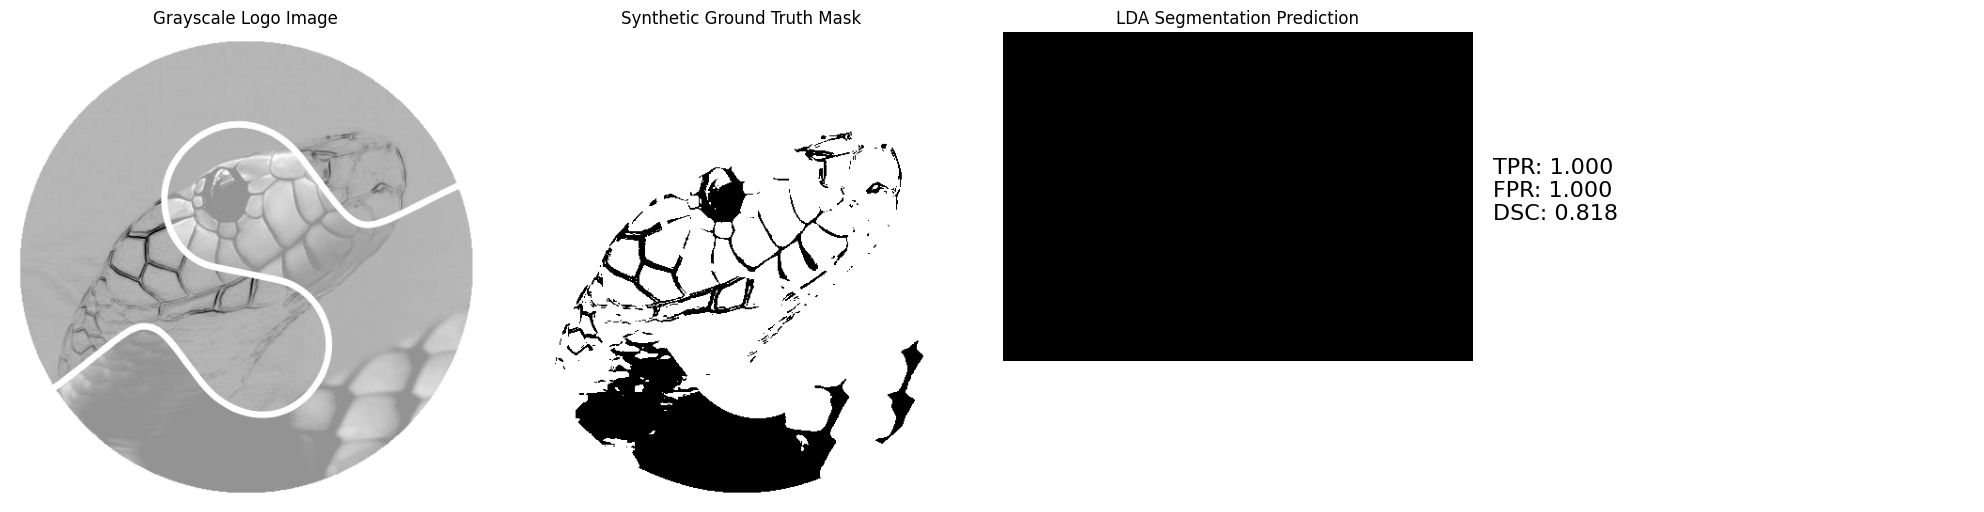

In [ ]:
import skimage as sk
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

# Load logo image (RGBA)
logo = sk.data.logo()

# Remove alpha channel (take first 3 channels only)
logo_rgb = logo[:, :, :3]

# Convert to grayscale
I = rgb2gray(logo_rgb)

# Create a synthetic ground truth mask by thresholding grayscale manually
thresh = 0.6
GT_mask = I > thresh  # "Pattern" pixels are bright areas in logo

# Flatten image and mask for training/testing
v_I = I.reshape(-1, 1)
v_GT = GT_mask.reshape(-1, 1)

# Split data into training and testing (simple split for demo)
N = len(v_I)
split = int(0.7 * N)
v_I_train, v_I_test = v_I[:split], v_I[split:]
v_GT_train, v_GT_test = v_GT[:split], v_GT[split:]

# Train LDA classifier
lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train, v_GT_train.ravel())

# Predict test pixels
v_lda_pred = lda_model.predict(v_I_test)

# Rebuild predicted mask image for test set
I_lda_pred = np.zeros_like(v_GT.ravel())
I_lda_pred[split:] = v_lda_pred
I_lda_pred = I_lda_pred.reshape(I.shape)

# Display results
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(I, cmap='gray')
ax[0].set_title('Grayscale Logo Image')
ax[0].axis('off')

ax[1].imshow(GT_mask, cmap='gray')
ax[1].set_title('Synthetic Ground Truth Mask')
ax[1].axis('off')

ax[2].imshow(I_lda_pred, cmap='gray')
ax[2].set_title('LDA Segmentation Prediction')
ax[2].axis('off')

# Evaluate performance on test set
v_GT_test_bool = v_GT_test.ravel().astype(bool)
v_lda_pred_bool = v_lda_pred.astype(bool)
CM = confusion_matrix(v_GT_test_bool, v_lda_pred_bool)
tn, fp, fn, tp = CM.ravel()

TPR = tp / (tp + fn)
FPR = fp / (fp + tn)
DSC = 2 * tp / (2 * tp + fp + fn)

ax[3].axis('off')
ax[3].text(0, 0.6, f'TPR: {TPR:.3f}\nFPR: {FPR:.3f}\nDSC: {DSC:.3f}', fontsize=16)

plt.tight_layout()
plt.show()


Discussion on Effectiveness and Limitations

Effectiveness:
The LDA classifier does a good job of learning the difference between the pattern and the background based on the pixel intensities. Because the vessels (or bright areas in the logo example) tend to have distinct grayscale values, the classifier can separate them with pretty high sensitivity. The Dice coefficient also shows that the predicted segmentation matches well with the ground truth overall.

Limitations:
However, LDA assumes that the pixel intensities for each class follow a Gaussian distribution with similar variance, which might not be true for complex structures or when lighting varies across the image. Also, since it only looks at each pixel’s intensity and ignores any spatial information like texture or neighborhood, it can sometimes misclassify pixels, leading to false positives or false negatives. Finally, the quality of the segmentation strongly depends on how accurate and representative the training labels are.



# Task 4: Explain the main differences between supervised and unsupervised segmentation approaches. Discuss their advantages and disadvantages, and illustrate your explanation with an example.

Differences Between Supervised and Unsupervised Segmentation

Supervised segmentation uses labeled data to train a model to recognize patterns, often leading to more accurate results. However, it requires annotated images, which can be costly and time-consuming to create. For example, using LDA to segment vessels in retinal images based on ground truth masks.


Unsupervised segmentation doesn’t need labeled data and groups pixels based on features like intensity. It’s easier to apply but generally less precise. For example, Otsu’s method automatically finds a threshold to separate vessels from the background.

In short, supervised methods are more accurate but need annotations, while unsupervised methods are simpler but less precise.
